Условие: Задача состоит в модификации кода градиентного спуска для задачи регрессии (ноутбук лекции - Gradient_descent.ipynb). Необходимо, чтобы ваш градиентный спуск мог решать задачи классификации, а именно линейной классификации и логистической регрессии.
На всякий случай напомню, что код будет разный, поэтому жду от вас две функции градиентного спуска.
Чтобы решить задачи, обратите внимание на пункт “Принцип максимального правдоподобия” статьи http://www.machinelearning.ru/wiki/images/6/68/voron-ML-Lin.pdf . Там находится ответ на вопрос “какая функция потерь”.

In [1]:
import numpy as np
import random
from sklearn.datasets.samples_generator import make_regression 
import pylab
from scipy import stats

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [117]:
# генерируем случайные данные
x, y = make_regression(n_samples=100, n_features=1, n_informative=1, 
                        random_state=0, noise=35)

In [6]:
m, n = np.shape(x)

In [118]:
# преобразуем x к следующему виду
x = np.c_[ np.ones(m), x]

In [119]:
x[:5]

array([[ 1.        , -0.35955316],
       [ 1.        ,  0.97663904],
       [ 1.        ,  0.40234164],
       [ 1.        , -0.81314628],
       [ 1.        , -0.88778575]])

In [24]:
# шаг алгоритма
alpha = 0.01

In [120]:
def gradient_descent_2(alpha, x, y, numIterations):
   
    theta = np.ones(2) # [ 1.  1.] ВЕСА МОДЕЛИ!!!
    
    for iter in range( 0, numIterations ):
        hypothesis = 1 / (1 + np.exp(-x @ theta.T)) 
        
        loss = hypothesis - y
        
        J = -y*np.log(hypothesis) - (1 - y)*np.log(1 - hypothesis) # функция потерь
        
#         print( "iter %s | J: %.3f" % (iter, J) )
        
        gradient = loss @ x        
        theta = theta - alpha * gradient  # update
    
    return theta

In [121]:
gradient_descent_2(0.01, x, y, 100)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


array([ -79.76275443, 4344.96194683])

In [122]:
theta = gradient_descent_2(alpha, x, y, 1000)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


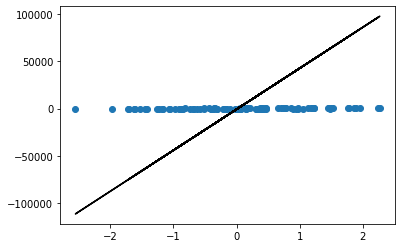

In [123]:
# построим полученную линию из theta
for i in range(x.shape[1]):
    y_predict = theta[0] + theta[1]*x 
    
# рисуем результат
pylab.plot(x[:,1],y,'o')
pylab.plot(x,y_predict,'k-')
pylab.show()